In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

dataset = "car_data.csv"
df = pd.read_csv(dataset)


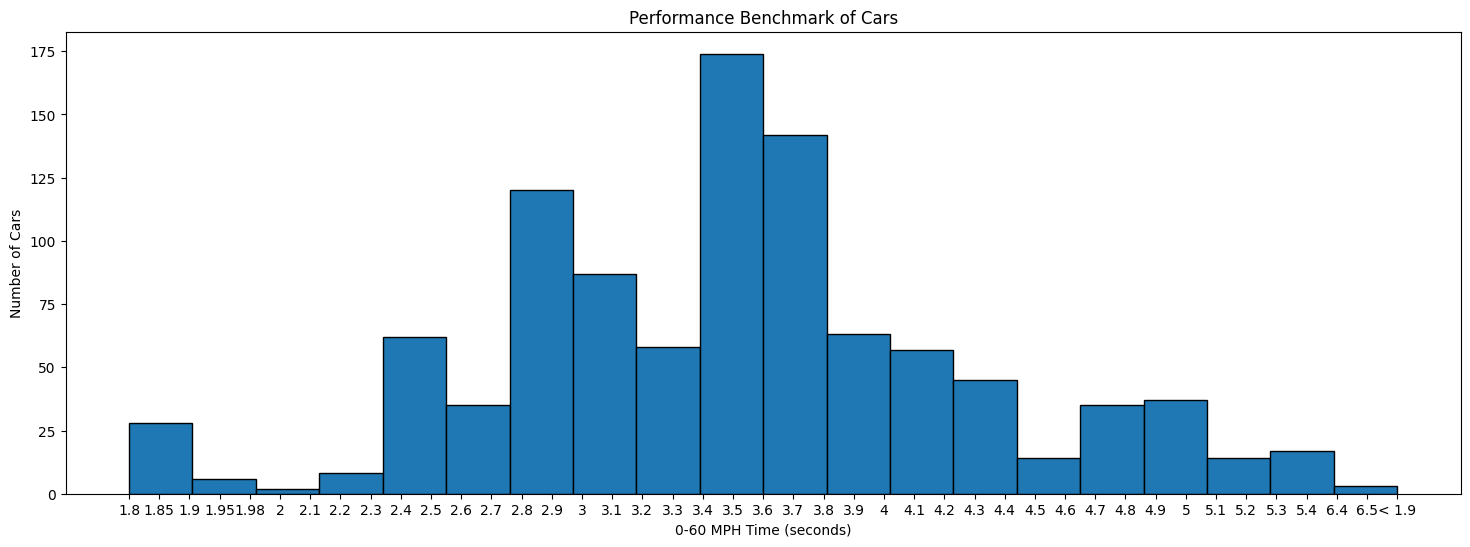

In [2]:
#Sort the '0-60 MPH Time (seconds)' column before plotting the histogram
sorted_0_60_time = df['0-60 MPH Time (seconds)'].sort_values()

#Plot the 0-60 MPH Time distribution
plt.figure(figsize=(18, 6))
plt.hist(sorted_0_60_time, bins=20, edgecolor='black')
plt.xlabel('0-60 MPH Time (seconds)')
plt.ylabel('Number of Cars')
plt.title('Performance Benchmark of Cars')
plt.show()

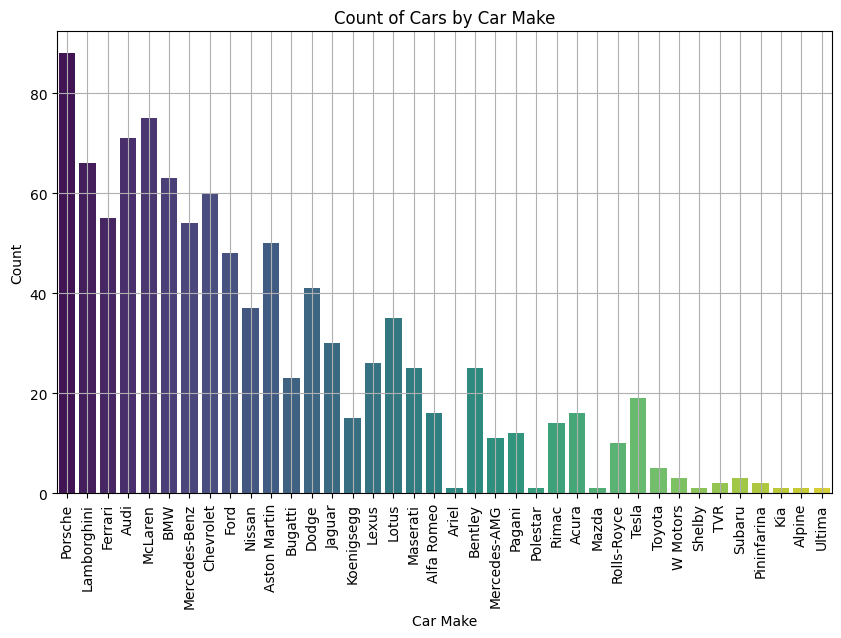

In [3]:
#Bar plot - Count of Cars by Car Make
plt.figure(figsize=(10, 6))
sns.countplot(x='Car Make', data=df, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.title('Count of Cars by Car Make')
plt.grid(True)
plt.show()

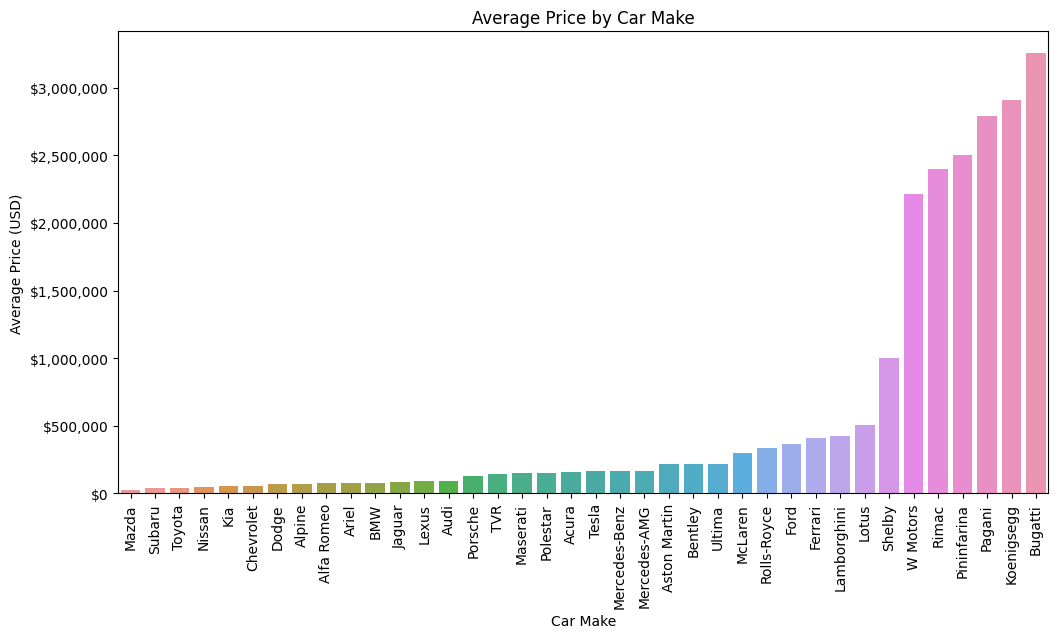

In [4]:
#Preprocess "Price (in USD)" column
df["Price (in USD)"] = df["Price (in USD)"].replace({",": ""}, regex=True).astype(float)

#Bar Plot - Average Price by Car Make (with modified x-axis and y-axis formatting)
plt.figure(figsize=(12, 6))
average_price_by_make = df.groupby("Car Make")["Price (in USD)"].mean().sort_values(ascending=True)
sns.barplot(x=average_price_by_make.index, y=average_price_by_make.values, order=average_price_by_make.index)
plt.title("Average Price by Car Make")
plt.xticks(rotation=90)
plt.ylabel("Average Price (USD)")

#Format y-axis to show true values of prices
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '${:,.0f}'.format(x)))

plt.show()

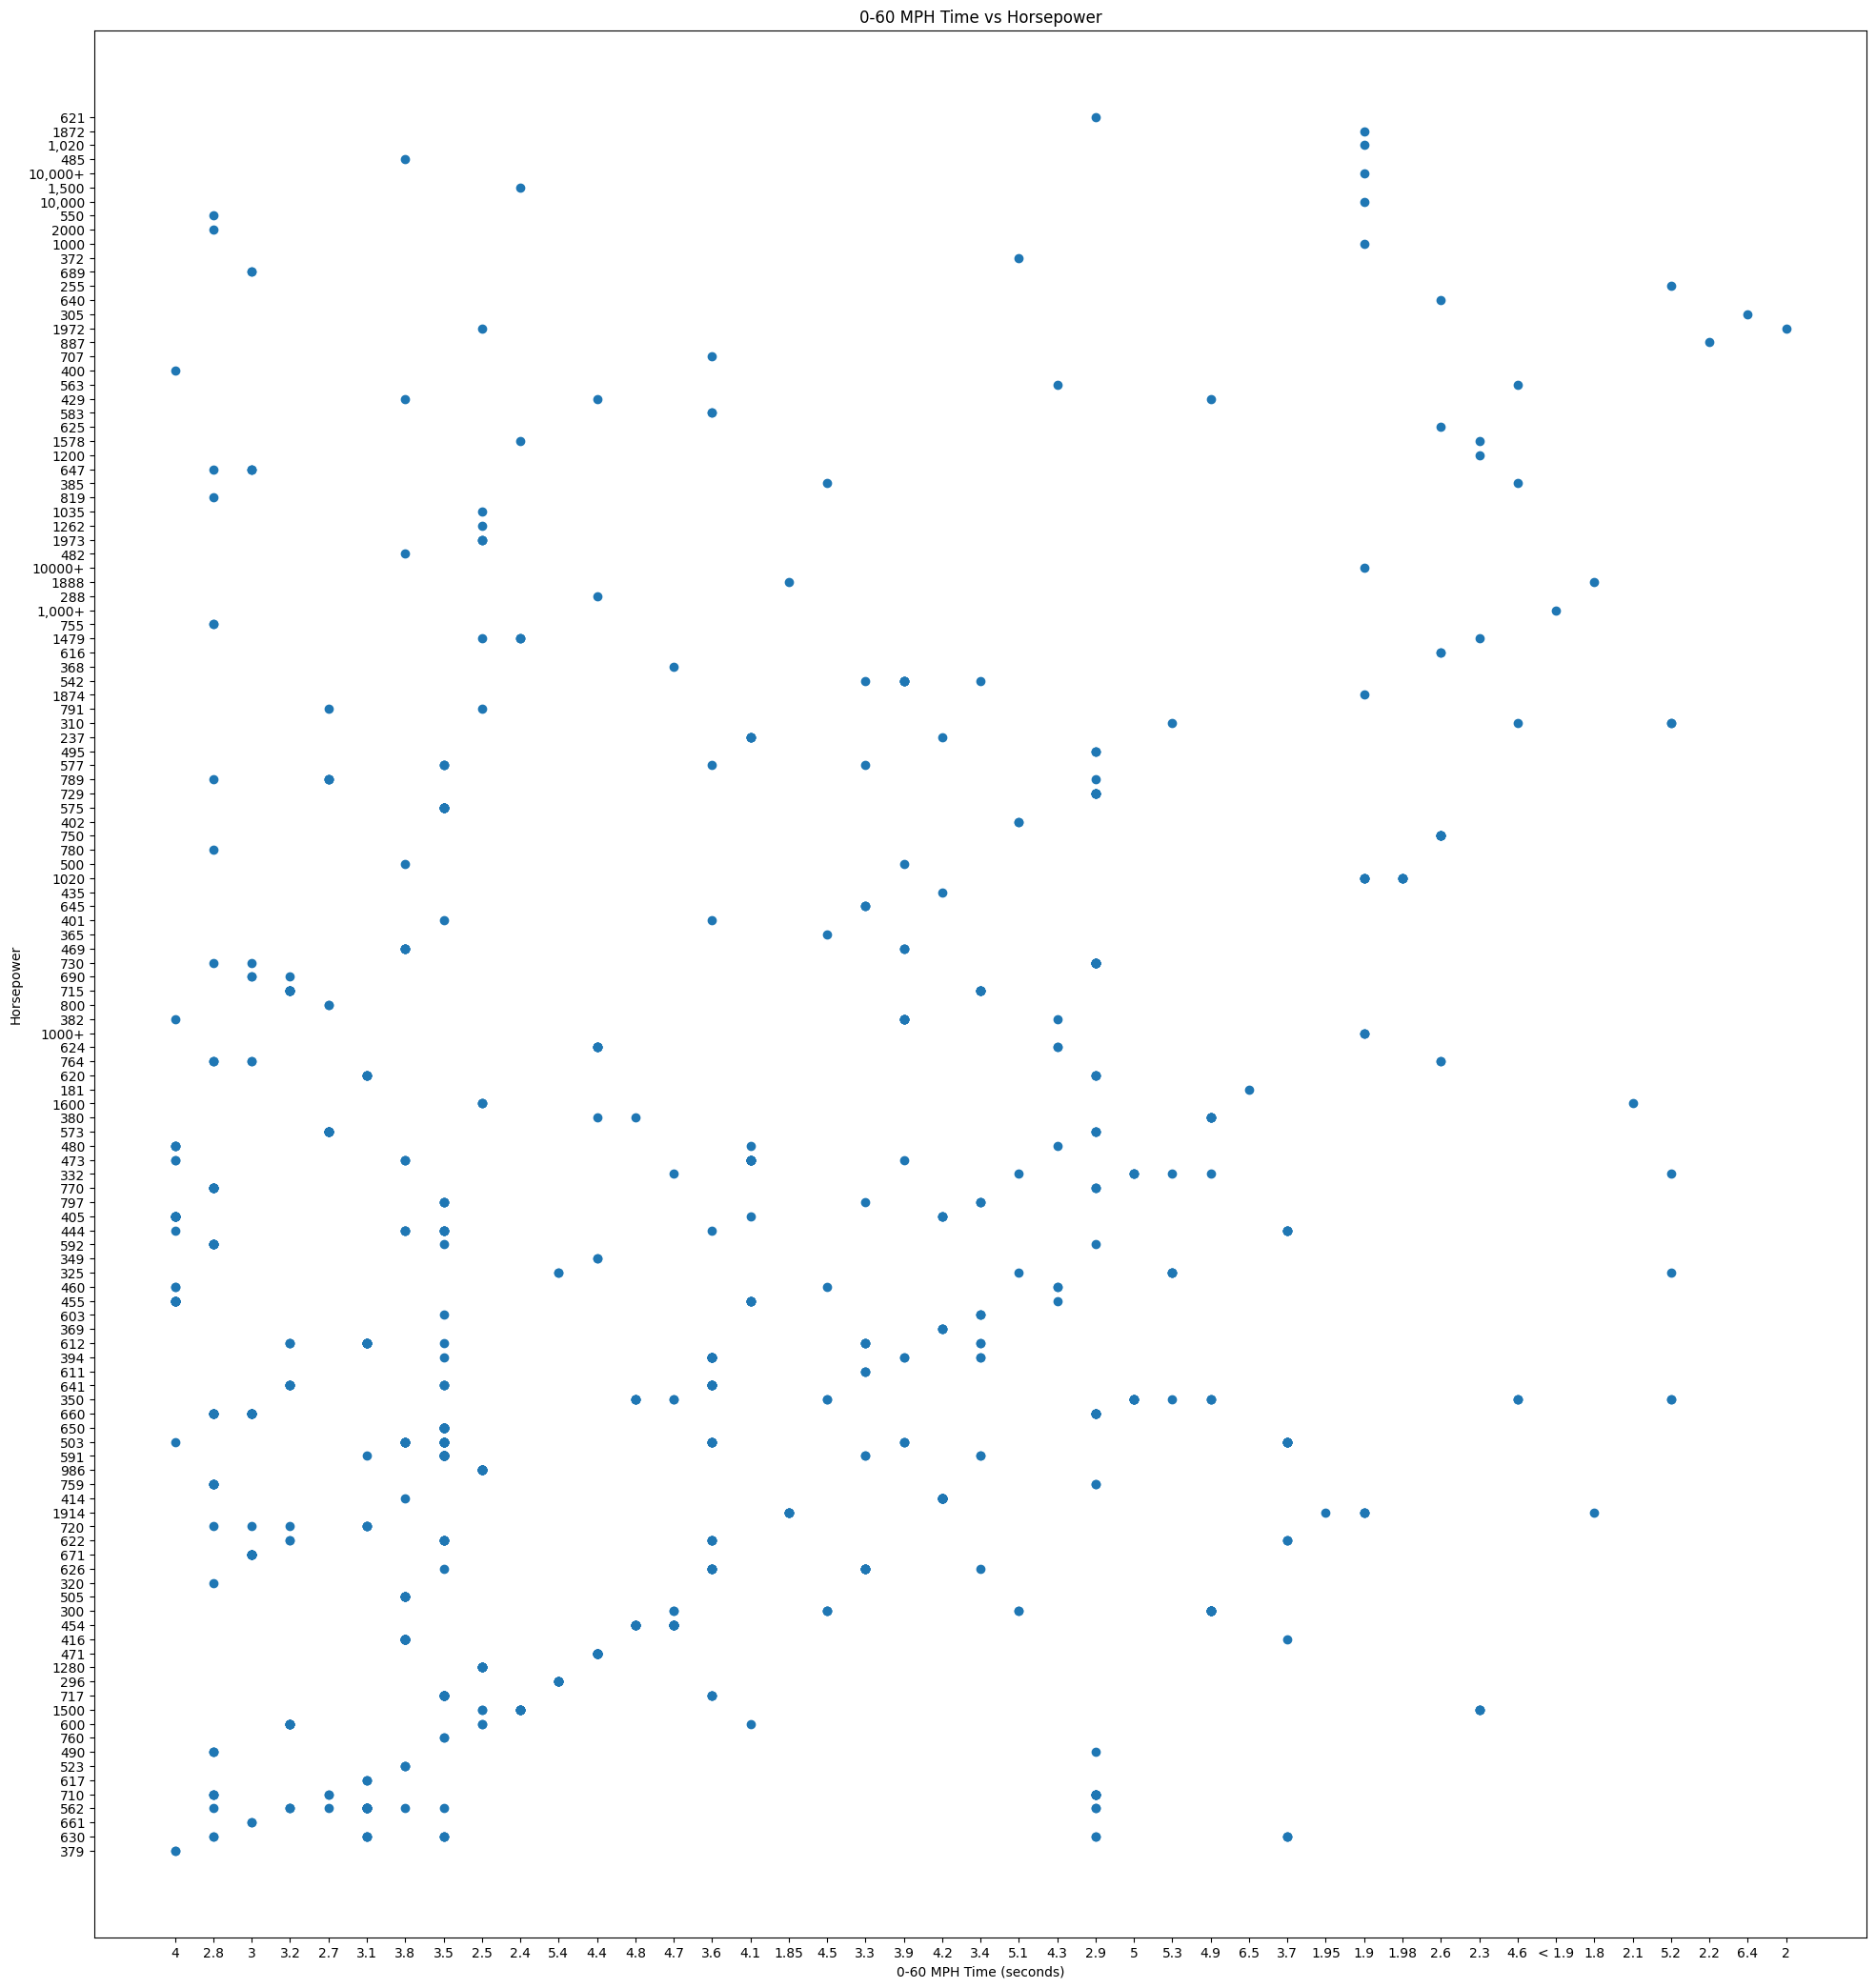

In [5]:
# Scatter Plot 10: 0-60 MPH Time vs Horsepower
plt.figure(figsize=(24, 26))
plt.scatter(df["0-60 MPH Time (seconds)"], df["Horsepower"])
plt.title("0-60 MPH Time vs Horsepower")
plt.xlabel("0-60 MPH Time (seconds)")
plt.ylabel("Horsepower")
plt.show()

In [6]:
df['Horsepower'] = df['Horsepower'].str.replace(r'[,+]', '', regex=True)
df['0-60 MPH Time (seconds)'] = df['0-60 MPH Time (seconds)'].str.replace(r'<\s*', '', regex=True)

X = df[['Year', 'Horsepower', '0-60 MPH Time (seconds)']]
y = df['Price (in USD)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred) / 1000000000
print("Mean Squared Error:", mse)

Mean Squared Error: 421.8009639197856


In [7]:
def preprocess_user_input(Year, Horsepower, time_0_to_60):
    Horsepower = Horsepower.replace(',', '').replace('+', '')
    time_0_to_60 = time_0_to_60.replace('<', '').strip()
    return int(Year), int(Horsepower), float(time_0_to_60)

def predict_car_price(year, horsepower, time_0_to_60, model):
    year, horsepower, time_0_to_60 = preprocess_user_input(year, horsepower, time_0_to_60)
    input_data = pd.DataFrame([[year, horsepower, time_0_to_60]], columns=['Year', 'Horsepower', '0-60 MPH Time (seconds)'])
    car_price = model.predict(input_data)[0]
    return car_price

def predict_price():
    year_input = input("Enter the car's year. Please enter only numerical digits: ")
    horsepower_input = input("Enter the car's horsepower. Please enter only numberical digits: ")
    time_0_to_60_input = input("Enter the car's 0-60 MPH time. Please enter only numerical digits: ")

    predicted_price = predict_car_price(year_input, horsepower_input, time_0_to_60_input, model)
    print(f"Predicted Car Price: ${predicted_price:.2f}")
    

In [8]:
predict_price()

Enter the car's year. Please enter only numerical digits:  2008
Enter the car's horsepower. Please enter only numberical digits:  414
Enter the car's 0-60 MPH time. Please enter only numerical digits:  4.6


Predicted Car Price: $89748.27


In [9]:
# First, run all cells.
# To use the prediction model, navigate to the cell above and hold shift + press Enter.
# You may also navigate to the cell below, type in predict_price() and hold shift + press Enter.